In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
milk=pd.read_csv('monthly-milk-production-pounds-p.csv', index_col='Month')

In [3]:
milk.head()

,Monthly milk production
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


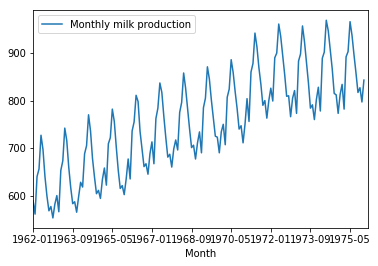

In [4]:
milk.plot()

In [5]:
train_set=milk.head(156)
test_set=milk.tail(12)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_scaled=scaler.fit_transform(train_set)
test_scaled=scaler.transform(test_set)

In [7]:
def next_batch(training_data,batch_size,steps):
    rand_start=np.random.randint(0,len(training_data)-steps)
    y_batch=np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    return y_batch[:,:-1].reshape(-1,steps,1),y_batch[:,1:].reshape(-1,steps,1)

In [8]:
import tensorflow as tf

num_inputs=1
num_time_steps=12
num_neurons=100
num_outputs=1
learning_rate=0.001 #0.03
num_train_iterations=6000 #4000
batch_size=1

C:\Users\codehax\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
x=tf.placeholder(tf.float32,[None,num_time_steps,num_inputs])
y=tf.placeholder(tf.float32,[None,num_time_steps,num_outputs])

In [10]:
#rnn cell layer
cell=tf.contrib.rnn.GRUCell(num_units=num_neurons, activation=tf.nn.relu)
cell=tf.contrib.rnn.OutputProjectionWrapper(cell,output_size=num_outputs)
outputs, states = tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [11]:
loss=tf.reduce_mean(tf.square(outputs-y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
train=optimizer.minimize(loss)
init=tf.global_variables_initializer()
saver=tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for iteration in range(num_train_iterations):
        x_batch,y_batch=next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train,feed_dict={x:x_batch,y:y_batch})
        if iteration % 100 == 0:
            mse=loss.eval(feed_dict={x:x_batch,y:y_batch})
            print(iteration,'\tMSE',mse)
        saver.save(sess,'./milk_tine_series_model')

0 	MSE 0.2100103
100 	MSE 0.04400371
200 	MSE 0.017181033
300 	MSE 0.033383176


KeyboardInterrupt: 

In [ ]:
#generative session
with tf.Session() as sess:
    saver.restore(sess, './rnn_tine_series_model')
    train_seed=list(train_scaled[-12])
    for iteration in range(12):
        x_batch=np.array(train_seed[-num_time_steps:]).reshape(1,num_time_steps,1)
        y_pred=sess.run(outputs,feed_dict={x:x_batch})
        train_seed.append(y_pred[0,-1,0])
    

In [ ]:
reults=scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [ ]:
test_set['Generated']=results

In [ ]:
test_set

In [ ]:
test_Set.plot()